<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez.
<br>
<i><b>Asignatura:</b></i> Aprendizaje Profundo
<br>
<i><b>Estudiante:</b></i> Laura Gomez
<br>
<i><b>Tema:</b></i> Taller redes Feed Fordward
<br>
<br> Agosto/2023
<br>
</FONT>
</div>

In [ ]:
import numpy as np
import tensorflow as tf
import  matplotlib.pyplot  as plt
from sklearn.metrics import accuracy_score
from tensorflow import keras

<FONT FACE="times new roman" SIZE=5>

#1)Calcular la salida de la siguiente red neuronal para los valores de entrada X dados:

w1 = 0.2, w2 = -0.1, w3=0.5, w4=0.1 w5 = -0.3 w6=0.3, w7=0.5, w8=0.2, w9=-0.2, w10=-0.3

umbrales: u1=1, u2=-1, u3=0.5, u4=0.5, u5=-0.6

X = [[1.1, 0.1]]

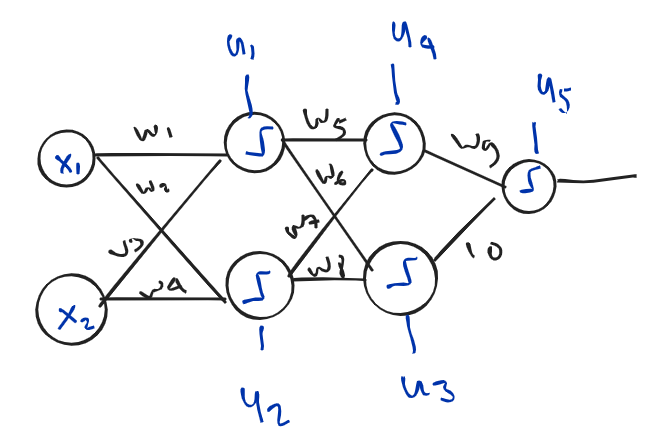

In [ ]:
def sigmoid(resultado):
  return 1/(1 + np.exp(-resultado))

In [ ]:
def neurona_simple(x1,w2,b):
  r1 = np.dot(x1,w2) + b
  return sigmoid(r1)

In [ ]:
def escalonada_unitaria(x, w, u):
  result = np.dot(x,w) + u
  if result >= u:
    return 1
  else:
    return 0

In [ ]:
x = np.array([1.1, 0.1])
w = np.array([0.2, -0.1, 0.5, 0.1, -0.3, 0.3, 0.5, 0.2, -0.2, -0.3])
u = np.array([1,-1, 0.5, 0.5, -0.6])

In [ ]:
neurona1 = escalonada_unitaria([x[0],x[1]],[w[0],w[2]],u[0])
neurona2 = escalonada_unitaria([x[0],x[1]],[w[1],w[3]],u[1])
neurona3 = escalonada_unitaria([neurona1,neurona2],[w[4],w[6]],u[2])
neurona4 = escalonada_unitaria([neurona1,neurona2],[w[5],w[7]],u[3])
neurona5 = escalonada_unitaria([neurona3, neurona4],[w[8],w[9]],u[4])
print("Valores de escalado unitario neurona 1",neurona1)
print("Valores de escalado unitario neurona 2",neurona2)
print("Valores de escalado unitario neurona 3",neurona3)
print("Valores de escalado unitario neurona 4",neurona4)
print("Valores de escalado unitario neurona 5",neurona5)


Valores de escalado unitario neurona 1 1
Valores de escalado unitario neurona 2 0
Valores de escalado unitario neurona 3 0
Valores de escalado unitario neurona 4 1
Valores de escalado unitario neurona 5 0


<FONT FACE="times new roman" SIZE=5>

#2) Repita el punto anterior sustituyendo las funciones de activación de escalón unitario por sigmoid

In [ ]:
neurona1 = neurona_simple([x[0],x[1]],[w[0],w[2]],u[0])
neurona2 = neurona_simple([x[0],x[1]],[w[1],w[3]],u[1])
neurona3 = neurona_simple([neurona1,neurona2],[w[4],w[6]],u[2])
neurona4 = neurona_simple([neurona1,neurona2],[w[5],w[7]],u[3])
neurona5 = neurona_simple([neurona3, neurona4],[w[8],w[9]],u[4])
print("Valores de activación neurona 1",neurona1)
print("Valores de activación neurona 2",neurona2)
print("Valores de activación neurona 3",neurona3)
print("Valores de activación neurona 4",neurona4)
print("Valores de activación neurona 5",neurona5)


Valores de activación neurona 1 0.7807427479121283
Valores de activación neurona 2 0.24973989440488234
Valores de activación neurona 3 0.5964384712325002
Valores de activación neurona 4 0.6865783206263973
Valores de activación neurona 5 0.2838871044212994


<FONT FACE="times new roman" SIZE=5>

#3) Cree la red neuronal del punto anterior con keras. Cargue los pesos(no se debe entrenar) y haga la predicción con la X dada. Corrobore que los resultados son los del punto anterior.

In [ ]:
@tf.function
def escalon(x, alpha=0.0, max_value=None, threshold=0.0):

  return tf.cast(x >= threshold, tf.float64)


In [ ]:
#USANDO ESCALÓN
model = keras.Sequential()
model.add(keras.layers.Input(2, name='capa_entrada'))
model.add(keras.layers.Dense(2, activation= escalon,
                             weights=[np.array([[w[0],w[2]], [w[1],w[3]]]),
                                      np.array([u[0], u[1]])],
                             name = 'Capa_oculta1'))
model.add(keras.layers.Dense(2, activation= escalon,
                             weights=[np.array([[w[4],w[6]], [w[5],w[7]]]),
                                      np.array([u[2], u[3]])],
                             name = 'Capa_oculta2'))
model.add(keras.layers.Dense(1, activation= escalon,
                             weights=[np.array([[w[8]], [w[9]]]),
                                      np.array([u[4]])],
                             name='capa_salida'))

In [ ]:
print("Predict usando keras con funcion de activación escalonada unitaria: ")
model.predict([[x[0],x[1]]])

Predict usando keras con funcion de activación escalonada unitaria: 
1/1 [==============================] - 0s 143ms/step


array([[0.]])

In [ ]:
#USANDO SIGMOID
model = keras.Sequential()
model.add(keras.layers.Input(2, name='capa_entrada'))
model.add(keras.layers.Dense(2, activation='sigmoid',
                             weights=[np.array([[w[0],w[2]], [w[1],w[3]]]),
                                      np.array([u[0], u[1]])],
                             name = 'Capa_oculta1'))
model.add(keras.layers.Dense(2, activation='sigmoid',
                             weights=[np.array([[w[4],w[6]], [w[5],w[7]]]),
                                      np.array([u[2], u[3]])],
                             name = 'Capa_oculta2'))
model.add(keras.layers.Dense(1, activation='sigmoid',
                             weights=[np.array([[w[8]], [w[9]]]),
                                      np.array([u[4]])],
                             name='capa_salida'))

In [ ]:
print("Predict usando kkeras con funcion de activación sigmoid")
model.predict([[x[0],x[1]]])

Predict usando kkeras con funcion de activación sigmoid


1/1 [==============================] - 0s 151ms/step


array([[0.28166226]], dtype=float32)

<FONT FACE="times new roman" SIZE=5>

# 4) Para la siguiente red calcular las salidas dados los valores de X, W y bias:



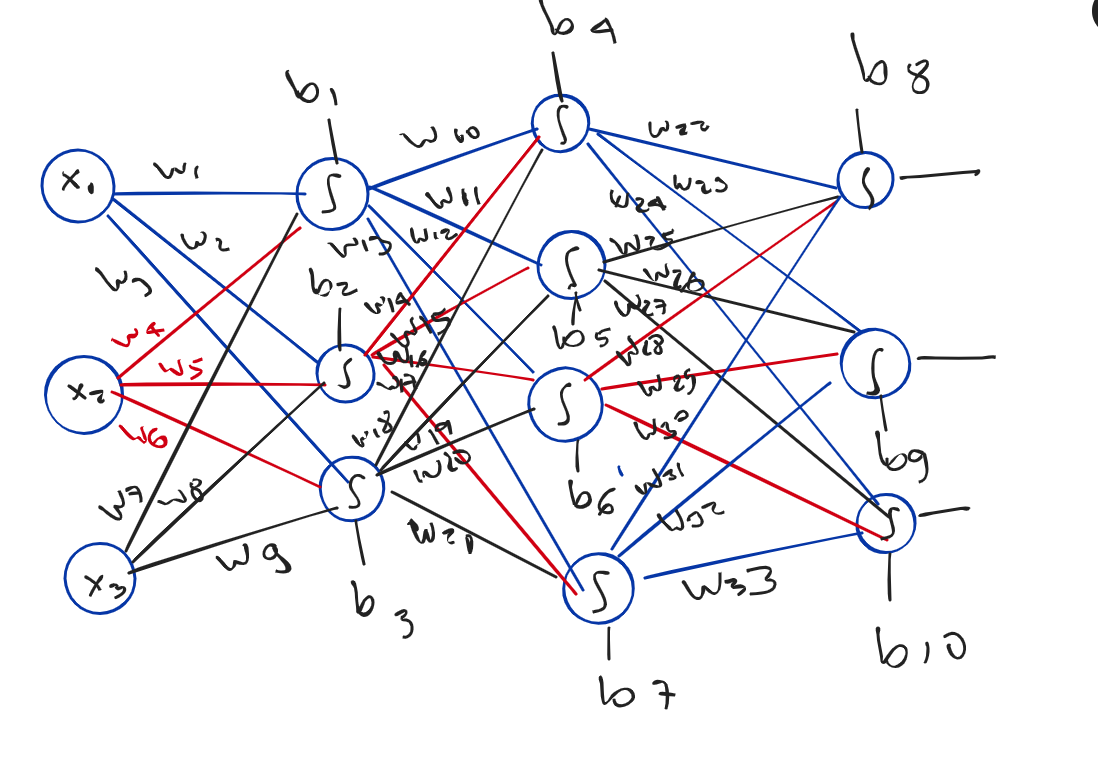

In [ ]:
np.random.seed(123)
weights = np.round(np.random.uniform(-1, 1, 33), 2)
bias = np.round(np.random.uniform(-1, 1, 10), 2)
X = np.round(np.random.uniform(-1, 1, (10, 3)), 2)
y = np.random.randint(0, 3, 10)
#w1, w2..., w33
print("w = " ,weights)
#b1, b2... b10
print("b = ", bias)
# X1, X2, X3 -> 10 muestras
print("X = \n ", X)
# y = 0 , y =1, y =2
print("y = ", y)

w =  [ 0.39 -0.43 -0.55  0.1   0.44 -0.15  0.96  0.37 -0.04 -0.22 -0.31  0.46
 -0.12 -0.88 -0.2   0.48 -0.64 -0.65  0.06  0.06  0.27  0.7   0.45  0.22
  0.44 -0.35 -0.28 -0.54 -0.41  0.26 -0.82 -0.13 -0.14]
b =  [-0.01 -0.15 -0.38 -0.15  0.79  0.89  0.    0.25 -0.77 -0.37]
X = 
  [[-0.17  0.73 -0.5 ]
 [-0.03  0.97  0.04]
 [ 0.23 -0.76  0.65]
 [ 0.21  0.09 -0.31]
 [-0.39 -0.17  0.36]
 [ 0.75  0.02  0.34]
 [ 0.17  0.25  0.35]
 [ 0.68 -0.83  0.53]
 [-0.51 -0.61  0.14]
 [-0.81  0.77  0.25]]
y =  [1 1 0 1 0 1 2 2 0 1]


In [ ]:
X[0]

array([-0.17,  0.73, -0.5 ])

In [ ]:
outcomes = []

for i in range(X.shape[0]):
  neurona1 = neurona_simple(X[i], [weights[0],weights[3],weights[6]], bias[0])
  neurona2 = neurona_simple(X[i], [weights[1],weights[4],weights[7]], bias[1])
  neurona3 = neurona_simple(X[i], [weights[2],weights[5],weights[8]], bias[2])
  neurona4 = neurona_simple([neurona1,neurona2,neurona3], [weights[9],weights[13],weights[17]], bias[3])
  neurona5 = neurona_simple([neurona1,neurona2,neurona3], [weights[10],weights[14],weights[18]], bias[4])
  neurona6 = neurona_simple([neurona1,neurona2,neurona3], [weights[11],weights[15],weights[19]], bias[5])
  neurona7 = neurona_simple([neurona1,neurona2,neurona3], [weights[12],weights[16],weights[20]], bias[6])
  neurona8 = neurona_simple([neurona4,neurona5,neurona6,neurona7], [weights[21],weights[24],weights[27],weights[30]], bias[7])
  neurona9 = neurona_simple([neurona4,neurona5,neurona6,neurona7], [weights[22],weights[25],weights[28],weights[31]], bias[8])
  neurona10 = neurona_simple([neurona4,neurona5,neurona6,neurona7], [weights[23],weights[26],weights[29],weights[32]], bias[9])
  outcomes.append(neurona10)


In [ ]:
for i in range(len(outcomes)):
  print("Número fila ",i+1, " valor de la salida: ", outcomes[i])

Número fila  1  valor de la salida:  0.414859930989196
Número fila  2  valor de la salida:  0.41661063924899927
Número fila  3  valor de la salida:  0.4167859826998258
Número fila  4  valor de la salida:  0.4153102664216197
Número fila  5  valor de la salida:  0.41567833071665067
Número fila  6  valor de la salida:  0.41762943166918626
Número fila  7  valor de la salida:  0.41696670101513883
Número fila  8  valor de la salida:  0.4171876924580931
Número fila  9  valor de la salida:  0.4144987646406674
Número fila  10  valor de la salida:  0.4156795125283973


<FONT FACE="times new roman" SIZE=5>

# 5) Construir la red anterior con keras, cargar los pesos(no entrenar), y determinar las salidas con predict. Corroborar los resultados con los del punto 4.

In [ ]:
layer1_weights = np.array([[weights[0],weights[3],weights[6]],
                           [weights[1],weights[4],weights[7]],
                           [weights[2],weights[5],weights[8]]])
layer1_bias = np.array([bias[0], bias[1], bias[2]])


In [ ]:

layer2_weights = np.array([[weights[9],weights[13],weights[17]],
                           [weights[10],weights[14],weights[18]],
                           [weights[11],weights[15],weights[19]],
                           [weights[12],weights[16],weights[20]]])
layer2_bias = np.array([bias[3], bias[4], bias[5], bias[6]])


In [ ]:

layer3_weights = np.array([[weights[21],weights[24],weights[27],weights[30]],
                           [weights[22],weights[25],weights[28],weights[31]],
                           [weights[23],weights[26],weights[29],weights[32]]])
layer3_bias = np.array([bias[7], bias[8], bias[9]])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(3, name='capa_entrada'))
model.add(keras.layers.Dense(3, activation='sigmoid',name='Capa_oculta1'))
model.layers[-1].set_weights([layer1_weights, layer1_bias])
model.add(keras.layers.Dense(4, activation='sigmoid',name='Capa_oculta2'))
model.layers[-1].set_weights([layer2_weights.T, layer2_bias])
model.add(keras.layers.Dense(3, activation='sigmoid',name='Capa_salida'))
model.layers[-1].set_weights([layer3_weights.T, layer3_bias])

In [ ]:
#para arreglar el problema de las dimensiones
for i in range(len(X)):
  input_data  = np.expand_dims(X[i], axis=0)
  print("Salida correspondiente a", i+1, " con valor de : ",model.predict(input_data))

1/1 [==============================] - 0s 97ms/step
Salida correspondiente a 1  con valor de :  [[0.482803   0.22123401 0.41548806]]
1/1 [==============================] - 0s 30ms/step
Salida correspondiente a 2  con valor de :  [[0.4825349  0.22077826 0.41436788]]
1/1 [==============================] - 0s 46ms/step
Salida correspondiente a 3  con valor de :  [[0.48667696 0.2242943  0.41557035]]
1/1 [==============================] - 0s 33ms/step
Salida correspondiente a 4  con valor de :  [[0.48111397 0.22141309 0.41558102]]
1/1 [==============================] - 0s 33ms/step
Salida correspondiente a 5  con valor de :  [[0.49053702 0.2249769  0.4159081 ]]
1/1 [==============================] - 0s 31ms/step
Salida correspondiente a 6  con valor de :  [[0.47780806 0.22026476 0.4141835 ]]
1/1 [==============================] - 0s 33ms/step
Salida correspondiente a 7  con valor de :  [[0.48343307 0.2219373  0.4146459 ]]
1/1 [==============================] - 0s 34ms/step
Salida correspond

<FONT FACE="times new roman" SIZE=5>

# 6) Calcular la salida de cada una de las capas como un producto matricial XW, AW, A*W

In [ ]:
def neurona_producto_matricial(x,w,b):
  unitos = np.ones((x.shape[0],1))
  X_unitos = np.concatenate([x, unitos], axis = 1)
  w_bias = np.hstack((w,b.reshape(-1,1)))
  w_bias = np.transpose(w_bias)
  r = np.dot(X_unitos,w_bias)
  return sigmoid(r)

In [ ]:
capa1 = neurona_producto_matricial(X, layer1_weights, layer1_bias)
capa2 = neurona_producto_matricial(capa1, layer2_weights, layer2_bias)
capa3 = neurona_producto_matricial(capa2, layer3_weights, layer3_bias)
print("Resultado de la primera capa: \n",capa1)
print("Resultado de la segunda capa: \n",capa2)
print("Resultado de la tercera capa: \n",capa3)


Resultado de la primera capa: 
 [[0.38147318 0.51482066 0.40709201]
 [0.52839442 0.57554221 0.37505288]
 [0.65196776 0.41512948 0.39687574]
 [0.44603601 0.42179721 0.37834001]
 [0.5415291  0.51901582 0.4614765 ]
 [0.64814608 0.41631968 0.30808231]
 [0.60283698 0.50409991 0.37168381]
 [0.66396185 0.3517171  0.34283181]
 [0.46617673 0.46324144 0.49660005]
 [0.49777501 0.65239876 0.4850045 ]]
Resultado de la segunda capa: 
 [[0.27856797 0.64410012 0.79199898 0.43404972]
 [0.2657081  0.63032061 0.80718549 0.41812139]
 [0.28562749 0.62917441 0.80423552 0.44108432]
 [0.29624771 0.64338116 0.78923821 0.44489407]
 [0.26389333 0.63320971 0.80469794 0.43227996]
 [0.29750506 0.6281517  0.80320787 0.43510809]
 [0.27531393 0.62822314 0.80714644 0.4268757 ]
 [0.30397855 0.63050836 0.79976345 0.44714576]
 [0.27229665 0.64167302 0.79520544 0.44563237]
 [0.24069475 0.63048785 0.81172045 0.41427582]]
Resultado de la tercera capa: 
 [[0.48620386 0.22248807 0.41485993]
 [0.48365508 0.22160365 0.41661064]


<FONT FACE="times new roman" SIZE=5>

# 7) Calcular el accuracy

In [ ]:
a = np.argmax(capa3, axis=1)
print("Accuracy: ",accuracy_score(y, a))

Accuracy:  0.3


In [ ]:
correctos = np.equal(np.argmax(capa3, axis=1), y)
accuracy = np.mean(correctos)
print("Accuracy de la capa 3 en comparación con y:", accuracy)

Accuracy de la capa 3 en comparación con y: 0.3


<FONT FACE="times new roman" SIZE=5>

# 8) Con cada uno de los siguientes funciones activación, construir un red neuronal de una sola neurona, weight=1 y bias 1. Calcular la salida (usar el método predict) para valores de X entre -5 y 5, variando de 0.1 en 0.1. Graficar X vs y:

* Linear
* Escalón unitario
* Sigmoid
* tanh (tangente hiperbólica)
* Relu
* Elu
* Selu

In [ ]:
X = np.arange(-5,5,0.1)
w = 1
b = 1
funciones = ['linear',escalon,'sigmoid','tanh','relu','elu','selu']

4/4 [==============================] - 0s 3ms/step


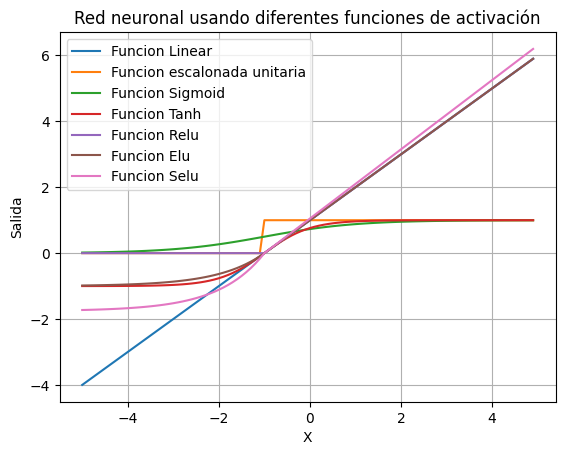

In [ ]:
for funcion in funciones:
  model = keras.Sequential()
  model.add(keras.layers.Input(1, name='capa_entrada'))
  model.add(keras.layers.Dense(1, activation= funcion,
                             weights = [np.array([[1]]),np.array([1])],
                             name='capa_salida'))
  predicciones = model.predict([X]).flatten()
  if funcion != escalon:
    plt.plot(X, predicciones, label = f'Funcion {funcion.capitalize()} ')
  else :
    plt.plot(X, predicciones ,label = 'Funcion escalonada unitaria')

plt.xlabel('X')
plt.ylabel('Salida')
plt.title('Red neuronal usando diferentes funciones de activación')
plt.legend()
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 3ms/step


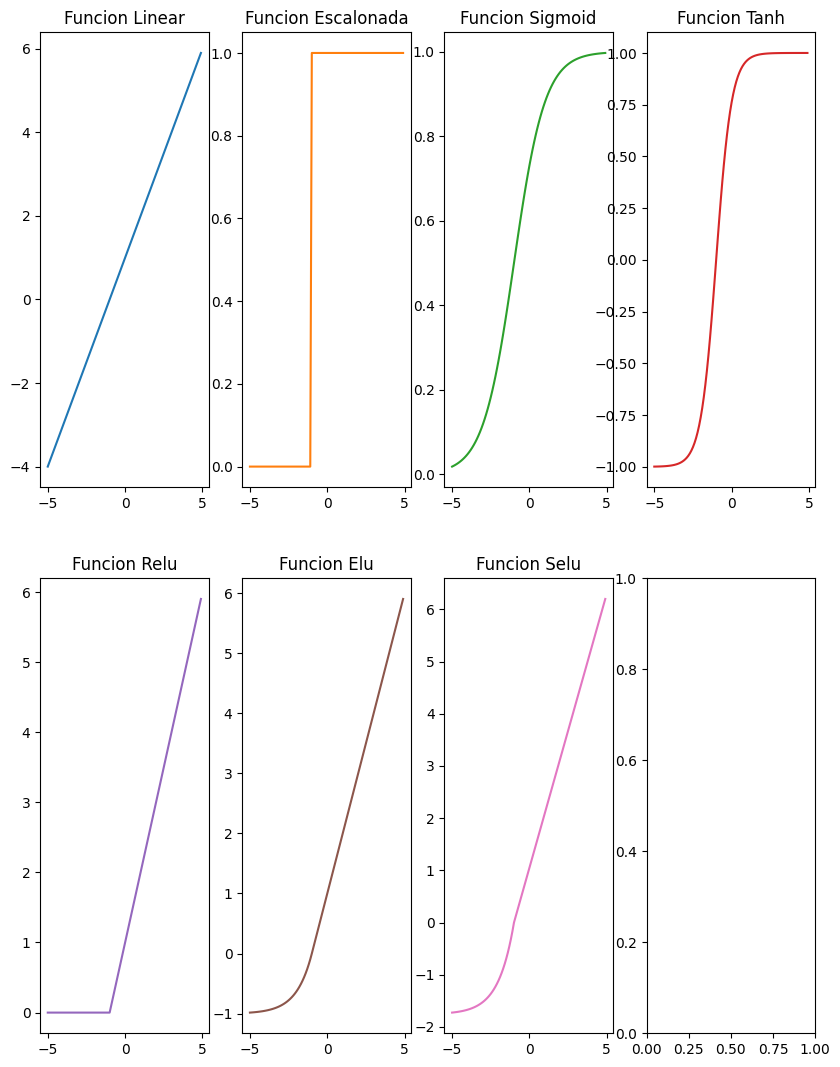

In [ ]:
#Para una mejor visualización individual de los resultados de cada función de activación
fig, axs = plt.subplots(2,4, figsize = (10,13))

for i, funcion in enumerate(funciones):
  row = i//4
  col = i%4
  model = keras.Sequential()
  model.add(keras.layers.Input(1, name='capa_entrada'))
  model.add(keras.layers.Dense(1, activation= funcion,
                             weights = [np.array([[1]]),np.array([1])],
                             name='capa_salida'))
  predicciones = model.predict([X]).flatten()
  if funcion != escalon:
    axs[row,col].plot(X, predicciones, color = f'C{i}')
    axs[row,col].set_title(f'Funcion {funcion.capitalize()}')
  else :
    axs[row,col].plot(X, predicciones, color = f'C{i}')
    axs[row,col].set_title('Funcion Escalonada')


plt.show()